日前臺灣央行赴立法院報告美國銀行倒閉事件影響，報告指出本次事件相關監理機關處理速度明快，對臺灣金融體系不至於產生系統性風險，係因

1) 我國金融業對美國倒閉三間銀行及瑞信暴險可控；\
2) 國銀2022年稅前淨利創高、平均ROE/ROA較前年上升、逾放比率續降；\
3) 平均資本適足率達14.68%，遠高於法定標準；\
4) 國銀資產配置以放款為主(占資產端約60%)、投資為輔(占約30%)，SVB銀行以投資為主(占約55%)、放款為輔(占約35%)。

然而，隨著我國金融業國際化程度日益深刻，本篇我們將利用金管會提供的數據，來分析臺灣整體金融業海外曝險情況。

refer from: https://www.banking.gov.tw/ch/home.jsp?id=192&parentpath=0,4&mcustomize=multimessage_view.jsp&dataserno=201703020001&dtable=Disclosure

#### Keywords: pdf to excel, panel data, multi-index

### 1. Retrieving Data 

- transform pdf file into dataframe

In [1]:
import numpy as np
import pandas as pd
import pdfplumber
import datetime as dt
import matplotlib.pyplot as plt
import datetime

In [2]:
# 1)create time_list 
year = np.arange(105, 112)
quar = np.arange(1,5)

time_list = []
for i in year: 
    for j in quar: 
        time_name = str(i)+'Q'+str(j)+'.pdf'
        time_list.append(time_name) 

# 2)connecting all the pdf file into dataframe
all_df = pd.DataFrame()

for yymm in time_list: 
    pdf = pdfplumber.open(yymm)
    df = pd.DataFrame()
    
    for i in range(len(pdf.pages)): 
        page = pdf.pages[i].extract_table()
        df = df.append(page, ignore_index=True)

    df.columns = df.iloc[0]
    df = df[1:]
    df.insert(1, "時間", yymm)
    df
    print(yymm, ' done!')
    all_df = all_df.append(df,ignore_index=True)
    
all_df

105Q1.pdf  done!
105Q2.pdf  done!
105Q3.pdf  done!
105Q4.pdf  done!
106Q1.pdf  done!
106Q2.pdf  done!
106Q3.pdf  done!
106Q4.pdf  done!
107Q1.pdf  done!
107Q2.pdf  done!
107Q3.pdf  done!
107Q4.pdf  done!
108Q1.pdf  done!
108Q2.pdf  done!
108Q3.pdf  done!
108Q4.pdf  done!
109Q1.pdf  done!
109Q2.pdf  done!
109Q3.pdf  done!
109Q4.pdf  done!
110Q1.pdf  done!
110Q2.pdf  done!
110Q3.pdf  done!
110Q4.pdf  done!
111Q1.pdf  done!
111Q2.pdf  done!
111Q3.pdf  done!
111Q4.pdf  done!


,國別,時間,存放及拆放金融同業,放款,放款已提列呆帳,放款淨額,投資,投資已提列評價或減損,投資淨額,暴險情形合計,存放及拆放\n金融同業,放款已提列\n呆帳,投資已提列\n評價或減損,暴險情形底\n合計,底\n暴險情形\n合計
0,美國,105Q1.pdf,"307,628","332,359","3,819","328,540","2,841,332","-2,937","2,838,395","3,474,563",NaN,NaN,NaN,NaN,NaN
1,中國大陸,105Q1.pdf,"568,198","778,241","10,633","767,608","1,115,429","-10,296","1,105,133","2,440,940",NaN,NaN,NaN,NaN,NaN
2,香港,105Q1.pdf,"57,440","443,534","4,422","439,112","247,424",-984,"246,440","742,992",NaN,NaN,NaN,NaN,NaN
3,英國,105Q1.pdf,"17,908","34,031",320,"33,710","553,570",789,"554,359","605,977",NaN,NaN,NaN,NaN,NaN
4,日本,105Q1.pdf,"195,704","65,066",584,"64,482","192,940","-2,855","190,086","450,272",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7070,尚比亞,111Q4.pdf,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
7071,辛巴威,111Q4.pdf,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
7072,海外暴險合計,111Q4.pdf,"1,971,360","3,966,444","45,374","3,921,071","19,646,235","-410,320","19,235,915","25,128,346",NaN,NaN,NaN,NaN,NaN
7073,台灣,111Q4.pdf,"1,552,742","23,731,669","312,348","23,419,321","15,786,759","-225,320","15,561,439","40,533,502",NaN,NaN,NaN,NaN,NaN


### 2. Sorting Data

- Moving Duplicated columns and integrate the values
- changing time format and set (time, country) as multi-index
- make sure the type of df.value is "int" rather than "string"

In [3]:
all_df['存放及拆放金融同業'] = all_df['存放及拆放金融同業'].fillna(all_df['存放及拆放\n金融同業'])
all_df['放款已提列呆帳'] = all_df['放款已提列呆帳'].fillna(all_df['放款已提列\n呆帳'])
all_df['投資已提列評價或減損'] = all_df['投資已提列評價或減損'].fillna(all_df['投資已提列\n評價或減損'])
all_df['暴險情形合計'] = all_df['暴險情形合計'].fillna(all_df['暴險情形底\n合計']).fillna(all_df['底\n暴險情形\n合計'])

all_df = all_df.drop(columns=['存放及拆放\n金融同業', '放款已提列\n呆帳', '投資已提列\n評價或減損','暴險情形底\n合計', '底\n暴險情形\n合計'])

In [4]:
# 將民國轉成西元
all_df['時間'] = all_df['時間'].str.replace('.pdf', '')
d = all_df['時間']

for i in range(len(all_df)):
    d.iloc[i]=d.iloc[i].replace(d.iloc[i][0:3], str(int(d.iloc[i][0:3]) + 1911))
d=pd.to_datetime(d)
d.dt.to_period('Q').dt.strftime('%YQ%q')

all_df = all_df.set_index(['時間','國別'], drop=True)

/Users/irenetsai/opt/anaconda3/envs/finlab/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [5]:
def abc(e):
    ret = str(e)
    ret = ret.replace(",", "")
    ret = int(ret)
    return ret

all_df = all_df.applymap(abc)
all_df

0                 存放及拆放金融同業        放款  放款已提列呆帳      放款淨額        投資  \
時間     國別                                                            
2016Q1 美國            307628    332359     3819    328540   2841332   
       中國大陸          568198    778241    10633    767608   1115429   
       香港             57440    443534     4422    439112    247424   
       英國             17908     34031      320     33710    553570   
       日本            195704     65066      584     64482    192940   
...                     ...       ...      ...       ...       ...   
2022Q4 尚比亞                0         0        0         0         0   
       辛巴威                0         0        0         0         0   
       海外暴險合計       1971360   3966444    45374   3921071  19646235   
       台灣           1552742  23731669   312348  23419321  15786759   
       國內及海外暴險總計    3524102  27698113   357721  27340392  35432994   

0                 投資已提列評價或減損      投資淨額    暴險情形合計  
時間     國別                                         
2016Q1 美國              -2937   2838395   3474563  
       中國大陸           -10296   1105133   2440940  
       香港               -984    246440    742992  
       英國                789    554359    605977  
       日本              -2855    190086    450272  
...                      ...       ...       ...  
2022Q4 尚比亞                 0         0         0  
       辛巴威                 0         0         0  
       海外暴險合計        -410320  19235915  25128346  
       台灣            -225320  15561439  40533502  
       國內及海外暴險總計     -635640  34797354  65661848  

[7075 rows x 8 columns]

### 3. Data Analysis


- Domestic and overseas risk exposure 
- Pie chart to view each country percentage 
- Time series analysis for each country 

Text(0.5, 1.0, 'Risk Exposure of Taiwan Banking')

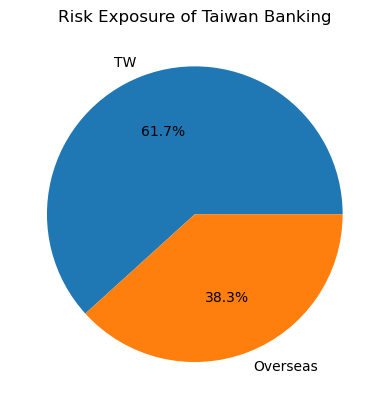

In [6]:
# 1. Domestic and overseas risk exposure percentage 
TW_22Q4 = all_df.loc[("2022Q4", "台灣"), "暴險情形合計"]/all_df.loc[("2022Q4", "國內及海外暴險總計"), "暴險情形合計"]
OS_22Q4 = all_df.loc[("2022Q4", "海外暴險合計"), "暴險情形合計"]/all_df.loc[("2022Q4", "國內及海外暴險總計"), "暴險情形合計"]

labels = ['TW','Overseas']
sizes = [TW_22Q4,OS_22Q4]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Risk Exposure of Taiwan Banking')

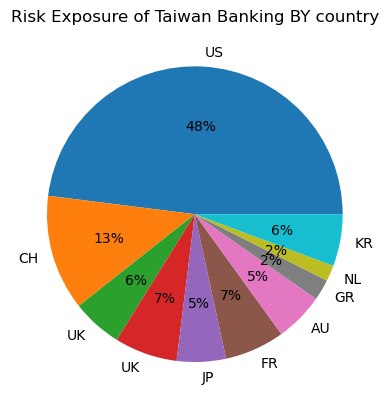

In [7]:
# 2. Pie chart to view each country percentage
labels = ['US','CH','UK','UK','JP','FR','AU','GR','NL','KR']#[k for k in all_df.index.get_level_values(1)[:10]]
sizes = [all_df.loc[("2022Q4", i), "暴險情形合計"]/all_df.loc[("2022Q4", "國內及海外暴險總計"), "暴險情形合計"] for i in all_df.index.get_level_values(1)[:10]]

plt.pie(sizes, labels=labels, autopct='%1.0f%%')
plt.title('Risk Exposure of Taiwan Banking BY country'); 

金控集團在國內及海外的曝險比重約為6比4(國內曝險約占62%，國外曝險約占38%)，顯示我國銀行業在海外曝險金額相當大。以國家別來看，又依序以美國、中國、英國、法國、南韓、香港、日本曝險占比為重。

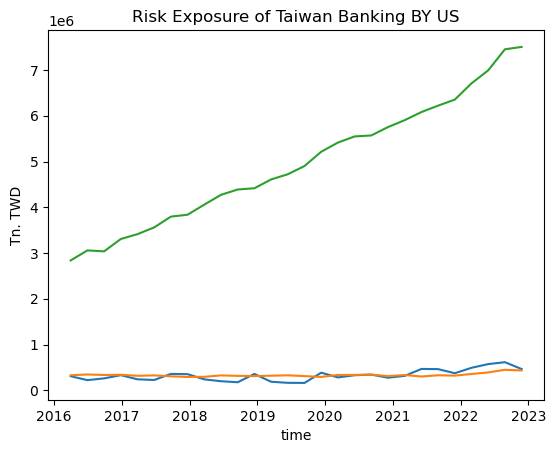

In [8]:
# 3. Time series analysis for each country
# US -- 存放及拆放金融同業、放款淨額、投資淨額
US = all_df.loc[(slice(None),'美國'), :]
keyrow = ['存放及拆放金融同業','放款淨額','投資淨額']
US[keyrow]
times = np.arange(np.datetime64('2016-03-31'),np.datetime64('2022-12-31'), 90)

fig, ax = plt.subplots()

ax.plot(times, US[keyrow].values)

ax.set(xlabel='time', ylabel='Tn. TWD',
       title='Risk Exposure of Taiwan Banking BY US')
#ax.legend(loc='upper right', shadow=True)

plt.show()

以時間序列資料來觀察：在美國方面，臺灣金控對美國放款淨額、同業拆款的金額趨勢平穩，投資則是逐年攀升，截止到2022Q4為止，我國金融業對美國投資項達約7.5兆新臺幣，因此美國股票債券等金融資產的波動才是對臺灣金融業最大的海外曝險。